In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()

plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

from pylab import rcParams
rcParams['figure.figsize'] = 8, 7

In [2]:
data = pd.read_csv('/home/azza/My thesis/Final Data/Lome/Lome.csv')
data

,Date,Consumption,Pop,Tmean,RH,Wind,Consumption/KWH
0,01/01/2013,1613.0,1667113,27.5,60.7,2.84,0.967541
1,02/01/2013,1860.0,"1,667,333",26.7,66.1,2.20,1.115554
2,03/01/2013,1860.0,"1,667,553",27.0,73.3,2.05,1.115407
3,04/01/2013,2142.0,"1,667,773",27.6,73.1,1.88,1.284347
4,05/01/2013,1878.0,"1,667,993",27.2,70.9,2.45,1.125904
...,...,...,...,...,...,...,...
1456,27/12/2016,2639.0,"2,011,053",27.0,74.4,1.95,1.312248
1457,28/12/2016,2693.0,"2,011,306",26.6,73.4,1.98,1.338931
1458,29/12/2016,2625.0,"2,011,558",26.4,73.8,1.93,1.304959
1459,30/12/2016,2614.0,"2,011,811",26.4,78.5,2.15,1.299327


In [3]:
# Remove the Date, Consumption and Population
data_droped = data.drop(columns = ['Consumption', 'Pop'])
data_droped

,Date,Tmean,RH,Wind,Consumption/KWH
0,01/01/2013,27.5,60.7,2.84,0.967541
1,02/01/2013,26.7,66.1,2.20,1.115554
2,03/01/2013,27.0,73.3,2.05,1.115407
3,04/01/2013,27.6,73.1,1.88,1.284347
4,05/01/2013,27.2,70.9,2.45,1.125904
...,...,...,...,...,...
1456,27/12/2016,27.0,74.4,1.95,1.312248
1457,28/12/2016,26.6,73.4,1.98,1.338931
1458,29/12/2016,26.4,73.8,1.93,1.304959
1459,30/12/2016,26.4,78.5,2.15,1.299327


In [4]:
#setting the index to my data

data_droped['Date'] = pd.to_datetime(data_droped['Date'])
data_droped.set_index('Date', inplace=True)
data_indexed = data_droped.asfreq('D')
data_indexed

,Tmean,RH,Wind,Consumption/KWH
Date,,,,
2013-01-01,27.5,60.7,2.84,0.967541
2013-01-02,27.9,56.3,2.76,1.301127
2013-01-03,29.2,80.2,3.96,1.424920
2013-01-04,28.5,78.4,3.16,1.096676
2013-01-05,25.9,88.8,2.03,1.010325
...,...,...,...,...
2016-12-27,27.0,74.4,1.95,1.312248
2016-12-28,26.6,73.4,1.98,1.338931
2016-12-29,26.4,73.8,1.93,1.304959


In [5]:
# Resample the data to weekly frequency
data_resampled = data_indexed.resample('W').mean()
# Print the first 5 rows of the weekly data
data_resampled

,Tmean,RH,Wind,Consumption/KWH
Date,,,,
2013-01-06,27.650000,74.850000,2.980000,1.155943
2013-01-13,26.428571,81.828571,3.494286,1.140486
2013-01-20,28.485714,80.842857,3.384286,1.332617
2013-01-27,28.485714,80.428571,3.667143,1.327037
2013-02-03,27.871429,73.671429,2.687143,1.271762
...,...,...,...,...
2016-12-04,28.385714,81.428571,3.244286,1.415145
2016-12-11,26.300000,85.314286,3.438571,1.203439
2016-12-18,27.942857,83.200000,2.645714,1.371090


In [6]:
data_resampled.index

DatetimeIndex(['2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27',
               '2013-02-03', '2013-02-10', '2013-02-17', '2013-02-24',
               '2013-03-03', '2013-03-10',
               ...
               '2016-10-30', '2016-11-06', '2016-11-13', '2016-11-20',
               '2016-11-27', '2016-12-04', '2016-12-11', '2016-12-18',
               '2016-12-25', '2017-01-01'],
              dtype='datetime64[ns]', name='Date', length=209, freq='W-SUN')

In [ ]:
data_resampled = data_resampled.reset_index(drop=True)
data_resampled

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming 'dates' is the index of your DataFrame
# le = LabelEncoder()
# dates_encoded = le.fit_transform(data_indexed.index)

# # Add the encoded dates as a column to your DataFrame
# data_indexed['date_encoded'] = dates_encoded
# data_encoded = data_indexed.reset_index(drop=True)
# data_encoded

In [ ]:
# df = data_encoded.set_index('date_encoded')
# df

In [7]:
# Rescale the data
scaler = StandardScaler()
scaler = scaler.fit(data_resampled)
data_scaled = scaler.transform(data_resampled)
data_scaled

array([[ 5.28081766e-01, -1.85674225e+00, -6.83060608e-01,
        -1.50353774e+00],
       [-6.62350569e-01, -8.13502862e-02,  4.67483884e-01,
        -1.71398871e+00],
       [ 1.34258810e+00, -3.32122129e-01,  2.21395201e-01,
         9.01957096e-01],
       [ 1.34258810e+00, -4.37518991e-01,  8.54194672e-01,
         8.25988385e-01],
       [ 7.43891137e-01, -2.15657815e+00, -1.33823178e+00,
         7.33927428e-02],
       [-9.40814273e-01,  1.47615310e-01, -1.71707501e-01,
        -7.76518422e-01],
       [ 1.32866492e+00, -1.97650271e-01,  7.64707878e-01,
         2.24624208e-01],
       [ 1.46789677e+00, -7.24634580e-01,  8.47802758e-01,
         7.75782985e-01],
       [ 1.23120262e+00, -9.93578295e-01,  3.23665822e-01,
         2.08857950e-01],
       [-7.87659236e-01,  2.38474673e-01,  6.49653429e-01,
        -1.39853259e-01],
       [ 1.24512580e+00, -3.72100249e-01,  3.62017305e-01,
         1.13872867e+00],
       [ 1.81597640e+00, -7.97322070e-01,  1.62442029e+00,
      

In [14]:
df_data = pd.DataFrame(data_scaled)
df_data

,0,1,2,3
0,0.528082,-1.856742,-0.683061,-1.503538
1,-0.662351,-0.081350,0.467484,-1.713989
2,1.342588,-0.332122,0.221395,0.901957
3,1.342588,-0.437519,0.854195,0.825988
4,0.743891,-2.156578,-1.338232,0.073393
...,...,...,...,...
204,1.245126,-0.183113,-0.091809,2.025615
205,-0.787659,0.805437,0.342842,-0.856855
206,0.813507,0.267550,-1.430915,1.425781
207,1.217279,0.492881,-0.973893,1.646458


In [15]:
df_data.columns = ['Tmean', 'RH', 'Wind','Consumption/KWH'] 
#df_data.index =data_indexed.index
df_data

,Tmean,RH,Wind,Consumption/KWH
0,0.528082,-1.856742,-0.683061,-1.503538
1,-0.662351,-0.081350,0.467484,-1.713989
2,1.342588,-0.332122,0.221395,0.901957
3,1.342588,-0.437519,0.854195,0.825988
4,0.743891,-2.156578,-1.338232,0.073393
...,...,...,...,...
204,1.245126,-0.183113,-0.091809,2.025615
205,-0.787659,0.805437,0.342842,-0.856855
206,0.813507,0.267550,-1.430915,1.425781
207,1.217279,0.492881,-0.973893,1.646458


In [16]:
df_data.index = data_resampled.index
df_data

,Tmean,RH,Wind,Consumption/KWH
Date,,,,
2013-01-06,0.528082,-1.856742,-0.683061,-1.503538
2013-01-13,-0.662351,-0.081350,0.467484,-1.713989
2013-01-20,1.342588,-0.332122,0.221395,0.901957
2013-01-27,1.342588,-0.437519,0.854195,0.825988
2013-02-03,0.743891,-2.156578,-1.338232,0.073393
...,...,...,...,...
2016-12-04,1.245126,-0.183113,-0.091809,2.025615
2016-12-11,-0.787659,0.805437,0.342842,-0.856855
2016-12-18,0.813507,0.267550,-1.430915,1.425781


In [17]:
df_data = df_data.reset_index()
df_data

,Date,Tmean,RH,Wind,Consumption/KWH
0,2013-01-06,0.528082,-1.856742,-0.683061,-1.503538
1,2013-01-13,-0.662351,-0.081350,0.467484,-1.713989
2,2013-01-20,1.342588,-0.332122,0.221395,0.901957
3,2013-01-27,1.342588,-0.437519,0.854195,0.825988
4,2013-02-03,0.743891,-2.156578,-1.338232,0.073393
...,...,...,...,...,...
204,2016-12-04,1.245126,-0.183113,-0.091809,2.025615
205,2016-12-11,-0.787659,0.805437,0.342842,-0.856855
206,2016-12-18,0.813507,0.267550,-1.430915,1.425781
207,2016-12-25,1.217279,0.492881,-0.973893,1.646458


In [ ]:
# df_data2 = df_data.merge(data_indexed[['Consumption/KWH']], left_index=True, right_index=True)
# df_data2

In [18]:
len(df_data)

209

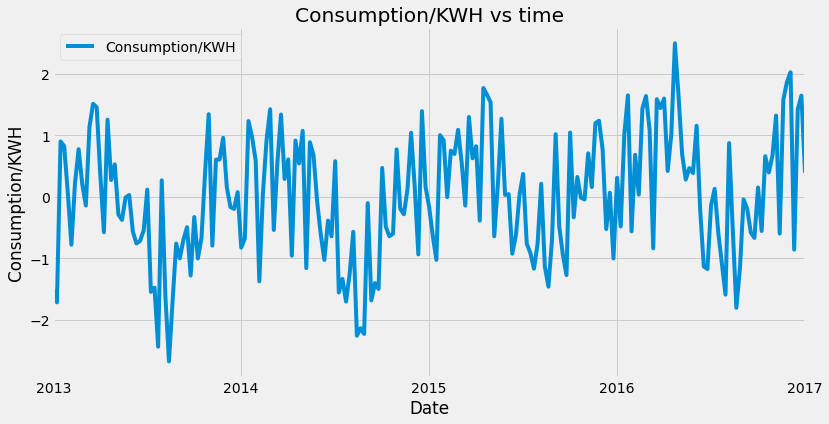

In [23]:
df_data.plot(x='Date', y='Consumption/KWH', figsize=(12,6))
plt.title('Consumption/KWH vs time' )
plt.ylabel('Consumption/KWH')
plt.show()

In [27]:
len(df_data) - 4

205

In [41]:
from sklearn.model_selection import train_test_split
# Prepare empty lists for input sequences and corresponding target values
X = []  # Input sequences
y = []  # Target values

past = 4

for i in range(len(df_data) - past):
    seq = df_data[i : i + past] 
    target = df_data.iloc[i + past,4] 
    X.append(seq)
    y.append(target)

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the data arrays
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (164, 4, 5)
y_train shape: (164,)
X_test shape: (41, 4, 5)
y_test shape: (41,)


In [43]:
# Verify the sizes of the splits
print("Training set size:", len(X_train))
#print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 164
Testing set size: 41


In [44]:
164+41

205

In [ ]:
# import numpy as np
# import pandas as pd

# # Define the number of days to use for prediction
# n_days = 30

# # Define the percentage of data to use for training
# train_pct = 0.9

# # Calculate the total number of rows in the data
# n_rows = len(df_data)

# # Calculate the number of rows to use for training
# train_size = int(train_pct * n_rows)

# # Calculate the number of rows to use for testing
# test_size = n_rows - train_size

# # Define the number of features to use for prediction
# n_features = 4

# # Initialize the training and testing arrays
# X_train = np.zeros((train_size - n_days + 1, n_days, n_features))
# y_train = np.zeros(train_size - n_days + 1)
# X_test = np.zeros((test_size - n_days + 1, n_days, n_features))
# y_test = np.zeros(test_size - n_days + 1)

# # Create the training data
# for i in range(train_size - n_days + 1):
#     X_train[i,:,:] = df_data.iloc[i:i+n_days,:].values
#     y_train[i] =df_data.iloc[i+n_days-1,0]

# # Create the testing data
# for i in range(train_size, n_rows - n_days + 1):
#     j = i - train_size
#     X_test[j,:,:] = df_data.iloc[i:i+n_days,:].values
#     y_test[j] = df_data.iloc[i+n_days-1,0]

# # Print the shapes of the training and testing data
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)

In [ ]:
# # Create the datasets
# #percent_train = 0.9  # the percentage of the data we want in the training_set
# past = 4       # the number of days in the past that we will use
# # future = 1

# # Split into X and Y
# X, Y = [], []
# for i in range(len(df_data) - past):
#     x = df_data[i:i+past]
#     y = df_data.iloc[i+past, 3] # take the column number 3 : Consumption/KWH
#     X.append(x)
#     Y.append(y)
# X_a, Y_a = np.array(X), np.array(Y)

# # Split into training and test set
# #size_train = int( percent_train * len(X) )  # the number of elements we want in the training set
# #X_train = X_a[:size_train]
# #y_train = Y_a[:size_train]
# #X_test  = X_a[size_train:]
# #y_test  = Y_a[size_train:]
# X_train1, y_train1 = X_a[:100], Y_a[:100]
# X_val1, y_val1 = X_a[100:150], Y_a[100:150]
# X_test1, y_test1 = X_a[150:], Y_a[150:]
# X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

In [ ]:
X_train1.shape[1:]

In [ ]:
print(X_a.shape)
print(Y_a.shape)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((4, 5)))
model1.add(LSTM(256,return_sequences=False))
model1.add(Dropout(0.2))
#model1.add(Dense(8))
model1.add(Dense(1))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               268288    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 268,545
Trainable params: 268,545
Non-trainable params: 0
_________________________________________________________________


In [46]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [47]:
model1.fit(X_train, y_train, #validation_data=(X_val1, y_val1),
           epochs=15  ,callbacks=[cp1])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Timestamp).

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

In [ ]:
plt.figure(figsize=(12,5))

import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:50])
plt.plot(train_results['Actuals'][:50])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(val_results['Val Predictions'][:50])
plt.plot(val_results['Actuals'][:50])

In [ ]:
# print("X_train.shape:", trainX.shape)
# print("y_train.shape:", trainY.shape)
# print("X_test.shape:", testX.shape)
# print("y_test.shape:", testY.shape)

In [ ]:
model = Sequential()
model.add(LSTM(units=256,
              #  activation='relu',
               input_shape=X_train.shape[1:],
               return_sequences=False
               ))
model.add(Dropout(0.2))
# model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse')
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.1)

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

In [ ]:
# Prediction on the test set
prediction = model.predict(X_test)

plt.figure(figsize=(12, 4))
plt.plot(y_test, label='True data')
plt.plot(prediction, label='Prediction')
plt.legend()